In [2]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Sampling

In [4]:
#The table colors is created as follows:
colors = Table().with_column(
'Color', make_array('blue', 'green', 'red', 'purple')
)

Find a numerical expression for the chance that all the entries of colors.sample(3).column(0) are the
same. Don’t simplify the arithmetic.

In [8]:
colors.sample(3).column(0)

array(['red', 'blue', 'red'],
      dtype='<U4')

# Binning

The table nba has a column labeled SALARY containing the 2015-2016 salaries of NBA players. Here
is the output of nba.select(‘SALARY’).hist(bins = make array(0, 2, 4, 12, 18, 26)) along with
the heights of the bars.

In [34]:
nba = Table.read_table("nba_salaries.csv")
nba = nba.relabeled("'15-'16 SALARY","SALARY")

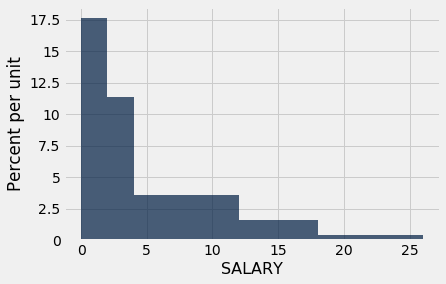

In [17]:
nba.select('SALARY').hist(bins = make_array(0, 2, 4, 12, 18, 26))

In [33]:
nba.select('SALARY').bin(bins = make_array(0, 2, 4, 12, 18, 26),density=True)

bin,SALARY density
0,0.176259
2,0.113909
4,0.0359712
12,0.0159872
18,0.0044964
26,0


(a) Which bin contains more players: [2, 4) or [4, 12)? Explain your choice.

(b) To see some more detail in the [4, 12) range, the histogram will be redrawn with bins as shown below.
The display includes the heights that are available from above.


<table style="width:100%">
<tr>
<th>bin (million dollars)</th>
<th>[0, 2)</th>
<th>[2, 4)</th>
<th>[4, 6)</th>
<th>[6, 12)</th>
<th>[12, 18)</th>
<th>[18, 26)</th>
</tr>
<tr>
<th>height (percent per million dollars)</th>
<th>17.63 </th>
<th>11.39 </th>
<th>(i) </th>
<th>(ii)</th>
<th>1.60</th>
<th>0.45</th>
</tr>
</table>

The expression nba.num rows evaluates to 417.
The expression nba.where(‘SALARY’, are.between(4, 6)).num rows evaluates to 56.
If possible, provide a numerical expression for each missing height (do not simplify the arithmetic). If
this is not possible, explain why not.

In [23]:
nba.where('SALARY', are.between(4, 6)).num_rows 

56

In [48]:
#What it actually is
nba.select('SALARY').bin(bins = make_array(0, 2, 4, 6, 12, 18, 26),density=True)

bin,SALARY density
0,0.176259
2,0.113909
4,0.0671463
6,0.0255795
12,0.0159872
18,0.0044964
26,0


# Scatter Plots

A group of UCSD students are walking around La Jolla and notice that La Jolla has some really nice houses. One students says "Man, the people who live in these houses must be really rich". One of the other students is taking DSC10 this quarter and wonders if they can find any data to support that claim. The student goes online and finds a csv file of La Jolla housing prices and income levels. The table they found is displayed below. 

In [15]:
housing = Table().with_columns("Housing Price in Millions", make_array(1.2,1.4,.7,.2,.35,2.2,2.5,1.3,1.2,.9,.85,.45,.33,.74),
                     "Average Household Income per Tenant", make_array(50, 250, 75, 15, 7, 55, 100, 180, 95, 80, 27, 35, 110,90),
                     "Number of Tenants in Household", make_array(4, 1, 1, 3, 8, 5,3,1,2,2,4,2,1,1))
housing

Housing Price in Millions,Average Household Income per Tenant,Number of Tenants in Household
1.2,50,4
1.4,250,1
0.7,75,1
0.2,15,3
0.35,7,8
2.2,55,5
2.5,100,3
1.3,180,1
1.2,95,2
0.9,80,2


The household income has been recored in a bit of a weird way. It has been reported as the average household income per tenant. So for the first house it has an average household income per tenant of 50 thousand dollars and it has 4 tenants so the total household income is 200 thousand dollars (50*4).

The student wants to generate a scatter plot that compares housing prices to total household income.
**Write the code to generate the scatter plot.**

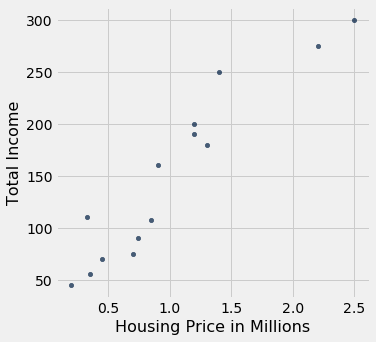

In [14]:
housing.with_column('Total Income', housing.column('Average Household Income per Tenant')
                    * housing.column('Number of Tenants in Household')).scatter('Housing Price in Millions',
                                                                               'Total Income')

### Does the chart support the claim that people who live in more expensive houses tend to make more money?